# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable pf predicting whether someone has heart disease on their medical attributes

We're doing to take the following approach:
1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem definition 

In a statement, 
> Given clinical parameters about a patient, can we predict whether they have heart disease?

## 2. Data

[Original data](https://archive.ics.uci.edu/ml/datasets/heart+disease)
[Kaggle](https://www.kaggle.com/mragpavank/heart-diseaseuci)

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features 

This is where you'll get different information about each feature in our data.

**Create a data dictionary**


1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholesterol in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiograph results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by fluoroscopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thallium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defected but ok now
    * 7: reversible defect: no proper blood movement when exercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation


In [128]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler

# Customizing Matplotlib plots
plt.style.use('tableau-colorblind10')

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\metrics\__init__.py)

## Load data

In [93]:
df = pd.read_csv("data/heart-disease.csv")
df.shape  # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject export on the dataset you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [94]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
# How many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

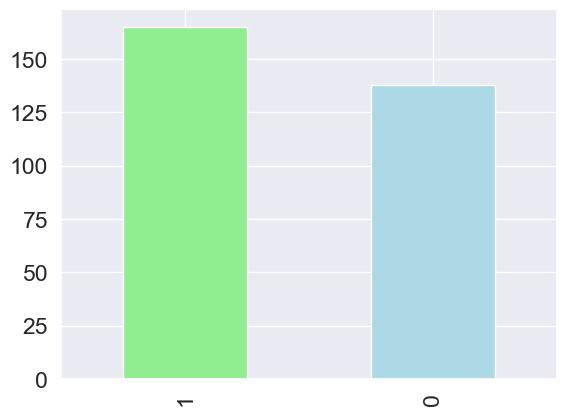

In [96]:
df["target"].value_counts().plot(kind="bar", color=["lightgreen", "lightblue"])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [98]:
# Missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [99]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [100]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [101]:
# Compare target column with sec column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(None,
 1    207
 0     96
 Name: sex, dtype: int64)

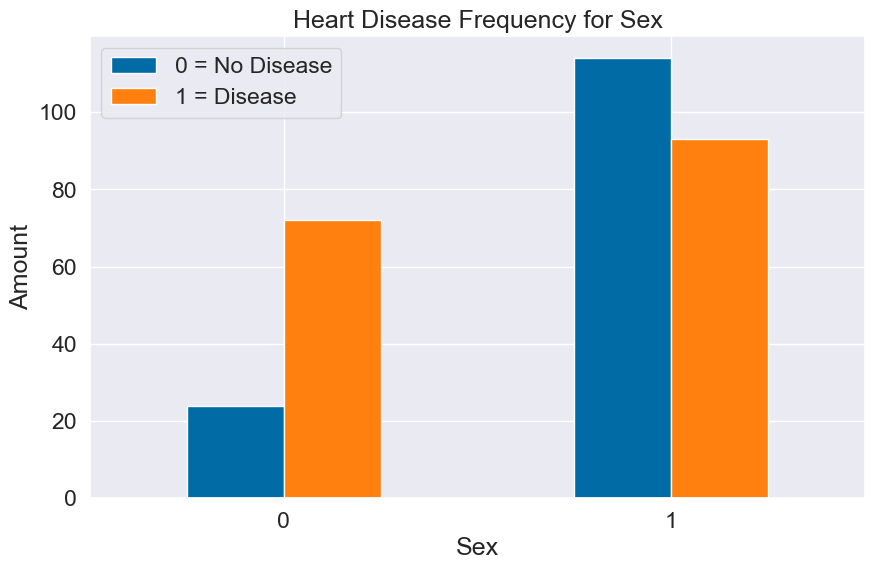

In [102]:
def compare_crosstab_plot(obj1, obj_name=""):
    if obj_name == "":
        obj_name = obj1.name.capitalize()
    # Create a plot of cross-tab
    pd.crosstab(obj1, df.target).plot(kind="bar",
                                      figsize=(10, 6))

    plt.title(f"Heart Disease Frequency for {obj_name}")
    plt.xlabel(obj_name)
    plt.ylabel("Amount")
    plt.legend(["0 = No Disease", "1 = Disease"])
    plt.xticks(rotation=0)


compare_crosstab_plot(df.sex), df.sex.value_counts()

In [103]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Heart Disease Frequency per Chest Pain Type
1. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

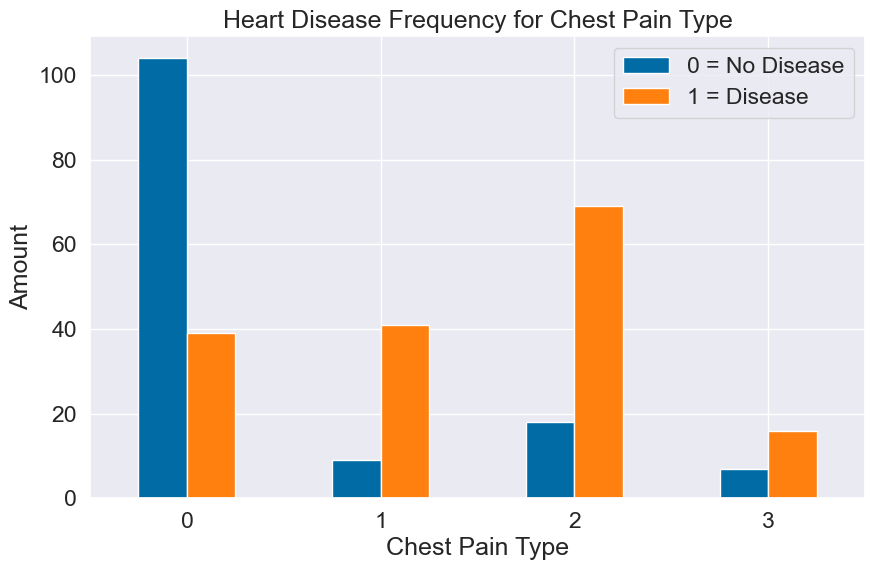

In [104]:
compare_crosstab_plot(df.cp, "Chest Pain Type")

### Age vs. Max Rate for Heart Disease

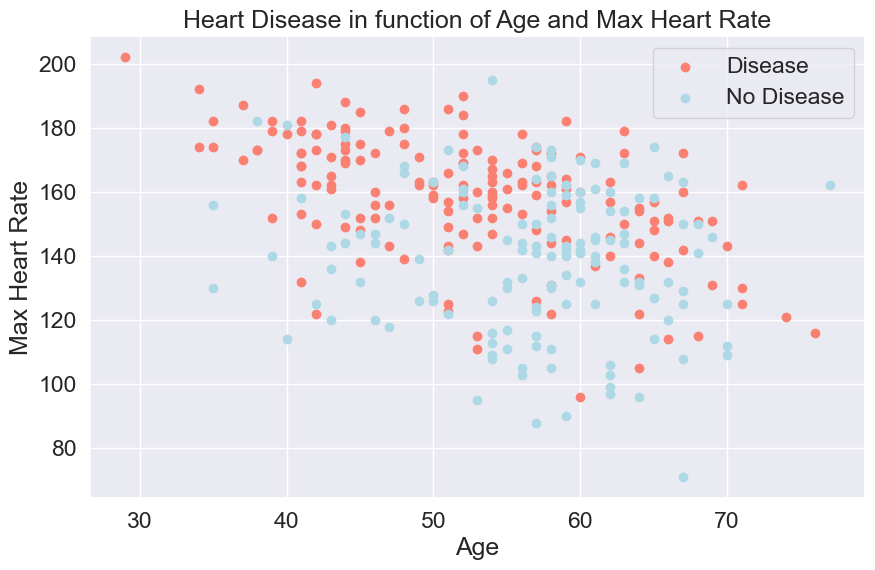

In [105]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

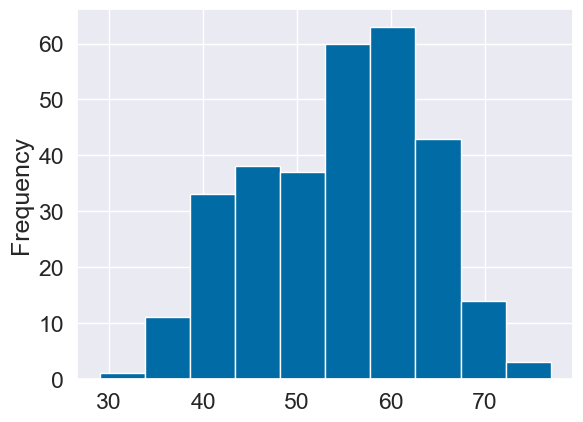

In [106]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [107]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Make a correlation Matrix

In [108]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


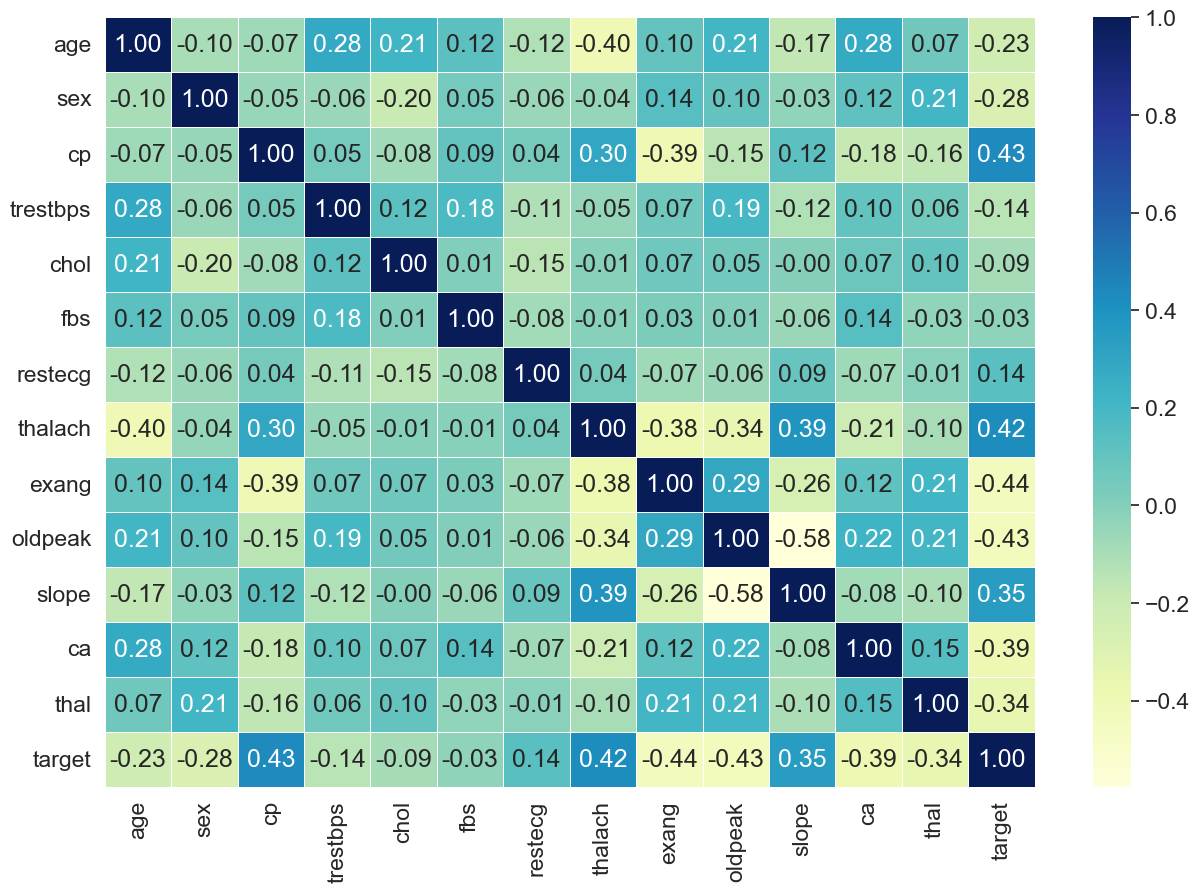

In [109]:
# Let's make our correlation matrix more visible
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

exang - exercise induced angina (1 = yes; 0 = no)

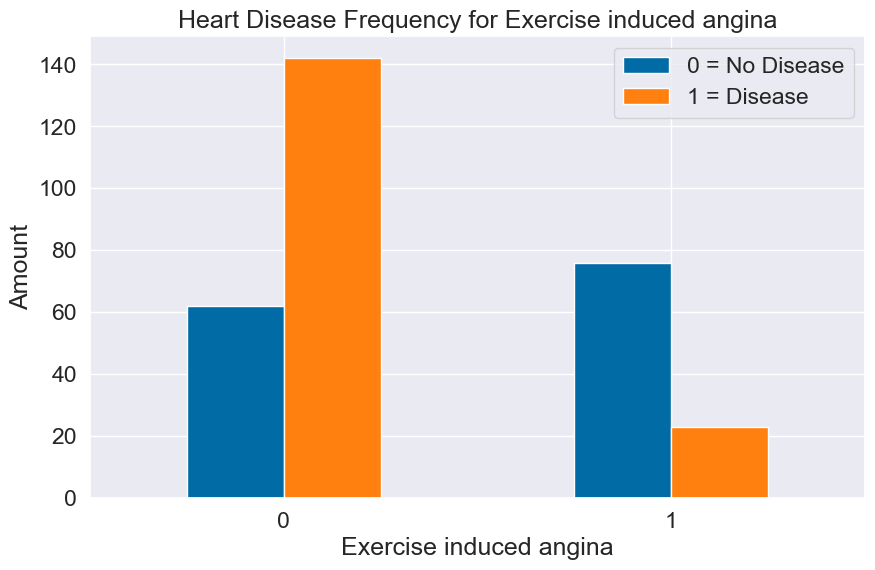

In [110]:
compare_crosstab_plot(df.exang, "Exercise induced angina")

In [111]:
df.target[df.exang == 1].value_counts()

0    76
1    23
Name: target, dtype: int64

## 5. Modeling

### Fit and Score a baseline model

In [112]:
# Split data into X and y
scaler = StandardScaler()
df = pd.read_csv("data/heart-disease.csv")
scaler.fit(df)
array = scaler.transform(df)
new_df = pd.DataFrame(array, columns = df.columns)
X, y = new_df.drop("target", axis=1), df["target"]
X, y

(          age       sex        cp  trestbps      chol       fbs   restecg  \
 0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
 1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
 2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
 3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
 4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
 ..        ...       ...       ...       ...       ...       ...       ...   
 298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
 299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
 300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
 301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
 302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   
 
       thalach     exang   oldpeak     slope        ca      th

In [113]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
   1. Logistic Regression
   2. K-Nearest Neighbours Classifier
   3. Random Forest Classifier


In [114]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [115]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9180327868852459,
 'Random Forest': 0.8360655737704918}

### Model Comparison

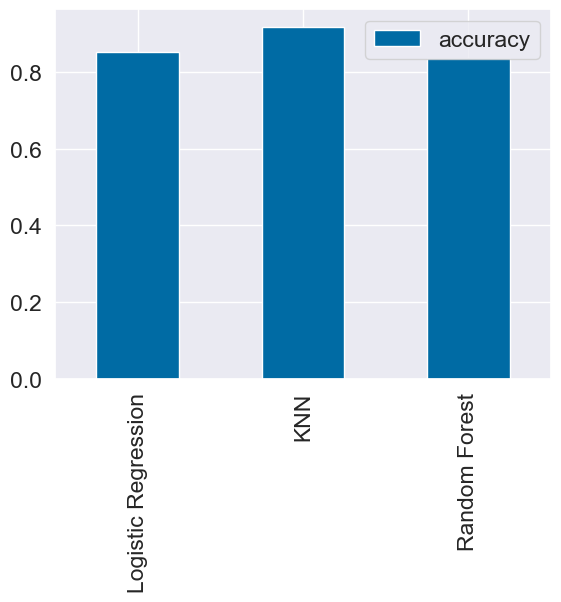

In [116]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning KNN

In [117]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the model
    knn.fit(X_train, y_train)

    # Update the training set
    train_scores.append(knn.score(X_train, y_train))

    # Update the test set
    test_scores.append(knn.score(X_test, y_test))

In [118]:
train_scores, test_scores

([1.0,
  0.8842975206611571,
  0.8884297520661157,
  0.8512396694214877,
  0.8636363636363636,
  0.8553719008264463,
  0.859504132231405,
  0.871900826446281,
  0.859504132231405,
  0.8388429752066116,
  0.8264462809917356,
  0.8388429752066116,
  0.8553719008264463,
  0.8512396694214877,
  0.8512396694214877,
  0.8471074380165289,
  0.8388429752066116,
  0.8512396694214877,
  0.8347107438016529,
  0.8388429752066116],
 [0.8524590163934426,
  0.819672131147541,
  0.8688524590163934,
  0.8852459016393442,
  0.9180327868852459,
  0.9344262295081968,
  0.9180327868852459,
  0.8524590163934426,
  0.8852459016393442,
  0.8852459016393442,
  0.8852459016393442,
  0.8688524590163934,
  0.8852459016393442,
  0.8688524590163934,
  0.9016393442622951,
  0.8852459016393442,
  0.8852459016393442,
  0.9016393442622951,
  0.8852459016393442,
  0.8852459016393442])

Maximum KNN score on the test data is 93.44%


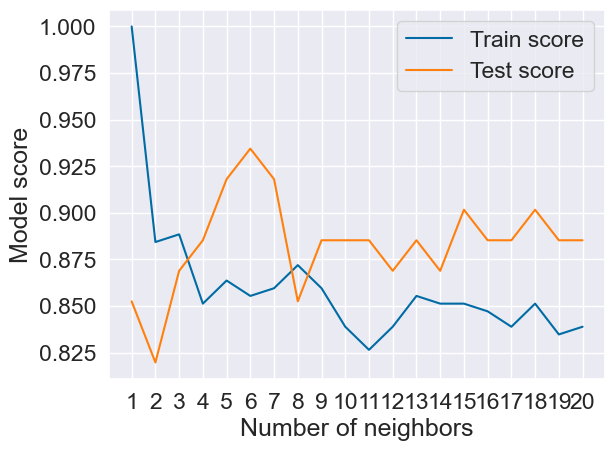

In [119]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data is {max(test_scores) * 100:.2f}%")

### Hyperparameter tuning with RandomizeSearchCV

We're going to tune:
* RandomForestClassifier
* LogisticRegression

... using RandomizedSearchCV

In [120]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [121]:
# Tune LogisticRegression model

np.random.seed(42)

# Setup hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [122]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [123]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [124]:
# Tune RandomForestClassifier model
np.random.seed(42)

# Setup hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [125]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [126]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [127]:
# Tune LogisticRegression model
np.random.seed(42)

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
                "penalty": ["l1", "l2", "elasticnet"],
                "multi_class": ["auto", "ovr", "multinomial"]
                }

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6150 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programs\miniconda\envs\is\Lib\site-packages

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             verbose=True)

In [88]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [89]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8524590163934426

### Evaluating our tuned machine learning classifier, beyond accuracy

* Confusion matrix
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

Prefer to use cross-validation where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [90]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
plot_roc_curve(gs_log_reg, X_test, y_test)

NameError: name 'plot_roc_curve' is not defined

In [ ]:
# Confusion metrics
confusion_matrix(y_test, y_preds)

In [ ]:
# Increase font size
sns.set(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,  # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")  # predictions go on the x-axis
    plt.ylabel("True label")  # true labels go on the y-axis


plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [ ]:
y_test.value_counts()

In [ ]:
print(classification_report(y_test, y_preds))

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(penalty='l2', solver='lbfgs', multi_class="multinomial", C=0.1082636733874054)

In [ ]:
# Cross-validated accuracy, precision, recall, f1-score
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))

cv_acc, cv_precision, cv_recall, cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1-score": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [ ]:
# Fit an instance of  LogisticRegression
clf = LogisticRegression(penalty='l2', solver='lbfgs', multi_class="multinomial", C=0.1082636733874054)

clf.fit(X_train, y_train)

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

2. sex - (1 = male; 0 = female)

In [ ]:
pd.crosstab(df["sex"], df["target"])

In [ ]:
pd.crosstab(df["slope"], df["target"])

slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?
